# Sentiment Analysis on Musical Instruments Reviews

This project is based on sentiments analysis on the data extracted from Kaggle. The data relies on the reviews of musical instruments. I performed several functions to analyse the data. The list of libraries and programs are given below:

In [11]:
#Data
import numpy as np
import pandas as pd
#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud  
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Data Modeling
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
# NGrams
from nltk.util import ngrams
from collections import Counter
import os
import warnings

In [12]:
data= pd.read_csv('Musical_instruments_reviews.csv') 

In [13]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [15]:
data.shape

(10261, 9)

In [16]:
data = data.iloc[:,1:]

In [17]:
data.head()

,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [18]:
data.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [19]:
data['summary'].value_counts()

Great                                                                    42
Five Stars                                                               32
Great!                                                                   30
Perfect                                                                  27
Good                                                                     25
                                                                         ..
Perfect for my applications                                               1
Works as Intended                                                         1
Fits the bill!                                                            1
Want rubber residue all over your guitar?                                 1
These strings are really quite good, but I wouldn't call them perfect     1
Name: summary, Length: 8852, dtype: int64

In [20]:
data.isnull().sum()

asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [21]:
print("Number of duplicates: " + str(data.duplicated().sum()))

Number of duplicates: 0


In [22]:
print('### Categorical features ###','\n')
data.describe(include=['O'])

### Categorical features ### 



,asin,reviewerName,helpful,reviewText,summary,reviewTime
count,10261,10234,10261,10254,10261,10261
unique,900,1397,269,10254,8852,1570
top,B003VWJ2K8,Amazon Customer,"[0, 0]","Not much to write about here, but it does exac...",Great,"01 22, 2013"
freq,163,66,6796,1,42,40


In [23]:
print('### Numerical features ###','\n')
data.describe(exclude=['O'])

### Numerical features ### 



,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [25]:
data.nunique()

asin                900
reviewerName       1397
helpful             269
reviewText        10254
overall               5
summary            8852
unixReviewTime     1570
reviewTime         1570
dtype: int64

In [26]:
data['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [28]:
print("Maximum: " + str(data['overall'].max()))
print("Minimum: " + str(data['overall'].min()))

Maximum: 5.0
Minimum: 1.0


In [33]:
data['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [34]:
data = data[['overall', 'summary']].copy() #create the dataframe only with overall and summary
data.head()

,overall,summary
0,5.0,good
1,5.0,Jake
2,5.0,It Does The Job Well
3,5.0,GOOD WINDSCREEN FOR THE MONEY
4,5.0,No more pops when I record my vocals.


In [35]:
def conv(row):                          # This function will return the value with sentiments of positive and negative 
    
    if row['overall'] < 2.0:
        val = 'Negative'
    elif row['overall'] > 3.0:
        val = 'Positive'
    else: 
        val = 'Neutral'
    
    return val

In [36]:
data['overall'] = data.apply(conv, axis=1) 
data

,overall,summary
0,Positive,good
1,Positive,Jake
2,Positive,It Does The Job Well
3,Positive,GOOD WINDSCREEN FOR THE MONEY
4,Positive,No more pops when I record my vocals.
...,...,...
10256,Positive,Five Stars
10257,Positive,"Long life, and for some players, a good econom..."
10258,Positive,Good for coated.
10259,Positive,Taylor Made


<AxesSubplot:xlabel='overall', ylabel='count'>

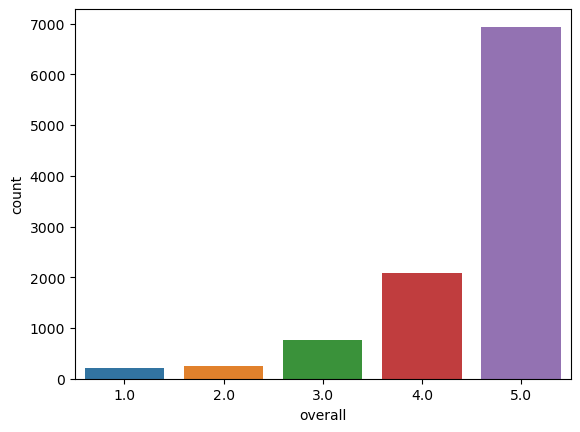

In [31]:
import seaborn as sns
sns.countplot(x=data['overall'],data=data)  #Find the value of the data with seaborn

In [37]:
data['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df,test_size=0.2,random_state=123)

In [76]:
X_train = train_df['overall']
X_test = test_df['overall']
y_train = train_df['overall']
y_test = test_df['overall']

In [77]:
# Build a pipeline to find out optimized parameters of TfidfVectorizer and Logistic Regression.
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

params = {'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
          'tfidf_vect__max_df': [0.25, 0.50, 0.75],
          'lr_clf__C': [1, 10, 20]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print('Optimized Hyperparameters: ', grid_cv_pipe.best_params_)

pred = grid_cv_pipe.predict(X_test)
print('Optimized Accuracy Score: {0: .3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Optimized Hyperparameters:  {'lr_clf__C': 1, 'tfidf_vect__max_df': 0.25, 'tfidf_vect__ngram_range': (1, 1)}
Optimized Accuracy Score:  1.000


In [78]:
corpus = df['summary']

# Concatenate the text into a single string
text = ' '.join(corpus)

# Remove symbols and special characters using regex
text = re.sub(r'[^\w\s]', '', text)

# Tokenize the cleaned text into words
words = nltk.word_tokenize(text)

# Create 5-grams
n = 5
five_grams = [' '.join(gram) for gram in ngrams(words, n)]


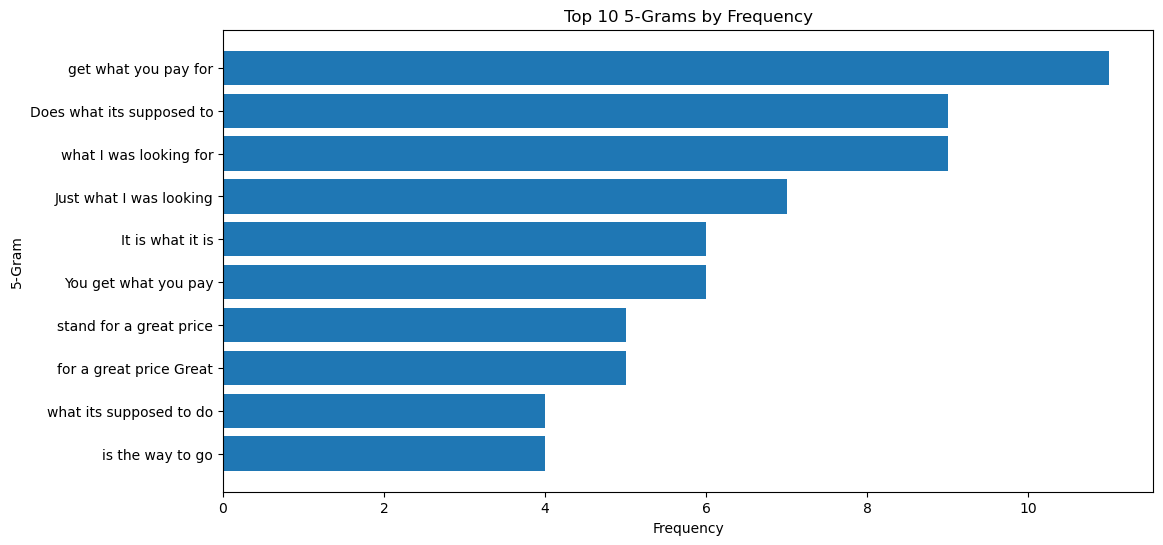

In [79]:
gram_counts = Counter(five_grams)

# Get the most common 5-grams
top_n = 10  # Change this value to display the top N 5-grams
top_grams = gram_counts.most_common(top_n)

# Extract the 5-grams and their frequencies
top_gram_names = [gram for gram, count in top_grams]
top_gram_counts = [count for gram, count in top_grams]

# Plot the top 5-grams and their frequencies
plt.figure(figsize=(12, 6))
plt.barh(top_gram_names, top_gram_counts)
plt.xlabel('Frequency')
plt.ylabel('5-Gram')
plt.title(f'Top {top_n} 5-Grams by Frequency')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent at the top
plt.show()